<a href="https://www.kaggle.com/code/nanduvardhanreddy/house-rent-analysis?scriptVersionId=115278290" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# DO UPVOTE👍 AND SUPPORT🤟

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


***NO NULL VALUES***

<AxesSubplot:>

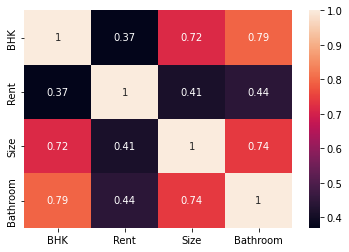

In [4]:
dk=df.corr()
dk
sns.heatmap(dk,annot=True,)

**WE CAB OBSERVE CORRELATION BETWEEN THE ATTRIBUTES HERE AND THERE IS NO MORE THAN 50% DEPENDENCY ON OTHER COLUMNS**

In [5]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

**WE CAN OBSERVE NO NULL VALUES**

In [6]:
df.duplicated().sum()

0

**NO DUPLICATES**

In [7]:
df['BHK'].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

# UNIVARIATE ANALYSIS

**BED ROOMS**

In [8]:
fig=px.bar(df['BHK'].value_counts(),
       color=df['BHK'].value_counts(),
       text=df['BHK'].value_counts(),
       title='BAR PLOT OF BED ROOMS',
       template='plotly_dark')
fig.update_layout(xaxis_title='Bed rooms count',yaxis_title='Total No.of Bedrooms')


**DOUBLE BED ROOM APARTMENTS ARE HIGH OVERALL BECAUSE MOST MIDDLE CLASS PEOPLE CHOOSE DOUBLE BED ROOMS APARTMENTS**

**UNIVARIATE ANALYSIS OF REMAINING COLUMNS**

In [9]:
features=['Area Type','City','Furnishing Status','Point of Contact']
for feature in features:
    fig=px.bar(df[feature].value_counts(),color=df[feature].value_counts(),text=df[feature].value_counts(),title=feature)
    fig.update_layout(xaxis_title=feature,yaxis_title='No.of Houses')
    fig.show()

**WE CAN OBSERVE ONLY 2 DATA POINTS ARE GIVEN IN BUILT AREA AND ONLY 1 DATA POINT ARE CONTACTED BUILDER TO RENT HOME AND MUMBAI HAS MORE HOUSES THAN OTHER CITIES AND MANY HOUSES ARE SEMI FURNISHED.**

**MORE THAN 75% PEOPLE CONTACTED DIRECTLY THROUGH OWNER**

In [10]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [11]:
px.box(df['Rent'])

**WE Can Observe there is so much irregularities in Rent which means so many outliers**

In [12]:
df['Rent'].sort_values(ascending=False).head(10)

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
1484     680000
1319     650000
726      600000
1384     600000
792      600000
Name: Rent, dtype: int64

In [13]:
df = df.drop(df.index[1837])

In [14]:
df['Rent'].sort_values(ascending=False).head(10)

1001    1200000
827     1000000
1329     850000
1459     700000
1484     680000
1319     650000
726      600000
1384     600000
3656     600000
792      600000
Name: Rent, dtype: int64

In [15]:
Q3=df['Rent'].quantile(0.75)
Q3

33000.0

In [16]:
Q1=df['Rent'].quantile(0.25)
Q1

10000.0

In [17]:
IQR=Q3-Q1
IQR

23000.0

In [18]:
OUTLIERS=Q3+1.5*2300
OUTLIERS

36450.0

In [19]:
OUTLIER=Q1-1.5*2300
OUTLIER

6550.0

**RENT BETWEEN 6550 TO 36450 ARE NOT OUTLIERS REMAINING ARE OUTLIERS**

**IQR MEANS INTER QUARTILE RANGE AND OUTLIERS ARE GREATER THAN Q3+1.5IQR AND LESS THAN Q1-1.5IQR**

In [20]:
px.histogram(df,x='Rent')

# BIVARIATE ANALYSIS

In [21]:
px.scatter(x='Rent',y='Size',data_frame=df)

**RENT NOT DIRECTLY DEPENDING ON SIZE OF THE HOUSE.WE CAN SEE AS SIZE INCREASES AND RENT BEING THE SAME**

In [22]:
px.scatter(df,x='BHK',y='Rent')

In [23]:
px.scatter(df,x='Rent',y='Area Type')

In [24]:
px.scatter(df,x='Rent',y='City')

In [25]:
df.groupby("City")['Rent'].mean().round(decimals=2)

City
Bangalore    21039.77
Chennai      21614.09
Delhi        29461.98
Hyderabad    20555.05
Kolkata      11645.17
Mumbai       85321.20
Name: Rent, dtype: float64

In [26]:
px.bar(df.groupby("City")['Rent'].mean(),
       color=df.groupby("City")['Rent'].mean().values,
       template='plotly_dark',
       text=df.groupby("City")['Rent'].mean().values.round(decimals=2))

**AVERAGE RENT PAYING BY MUMBAI PEOPLE IS 85321**

**BECAUSE OF THE HUGE OUTIERS IN OUR DATA WE GOT 85000 AS THE AVERAGE RENT WHICH IS PRACTICALLY IMPOSSIBLE MAYBE OUR DATA IS WRONG OR SOME DATA POINTS ARE MISSING**

In [27]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [28]:
y=df['Rent']
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4745, dtype: int64

In [29]:
df.drop(['Posted On','Floor','Area Locality','Rent'],axis=1,inplace=True)

In [30]:
df.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [31]:
Data=df

In [32]:
Data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [33]:
Data['Area Type'] = Data['Area Type'].replace('Carpet Area',1)
Data['Area Type'] = Data['Area Type'].replace('Super Area',2)
Data['Area Type']=Data['Area Type'].replace('Built Area',3)
Data['City'] = Data['City'].replace('Kolkata',1)
Data['City'] = Data['City'].replace('Delhi',2)
Data['City'] = Data['City'].replace('Mumbai',3)
Data['City'] = Data['City'].replace('Bangalore',4)
Data['City'] = Data['City'].replace('Hyderabad',5)
Data['City'] = Data['City'].replace('Chennai',6)

Data['Tenant Preferred'] = Data['Tenant Preferred'].replace('Bachelors/Family',1)
Data['Tenant Preferred'] = Data['Tenant Preferred'].replace('Bachelors',2)
Data['Tenant Preferred'] = Data['Tenant Preferred'].replace('Family',1)

Data['Furnishing Status'] = Data['Furnishing Status'].replace('Unfurnished',1)
Data['Furnishing Status'] = Data['Furnishing Status'].replace('Semi-Furnished',2)
Data['Furnishing Status'] = Data['Furnishing Status'].replace('Furnished',3)

Data['Point of Contact'] = Data['Point of Contact'].replace('Contact Owner',1)
Data['Point of Contact'] = Data['Point of Contact'].replace('Contact Agent',2)
Data['Point of Contact'] = Data['Point of Contact'].replace('Contact Builder',3)

In [34]:
Data

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,2,1,1,1,2,1
1,2,800,2,1,2,1,1,1
2,2,1000,2,1,2,1,1,1
3,2,800,2,1,1,1,1,1
4,2,850,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...
4741,2,1000,1,5,2,1,2,1
4742,3,2000,2,5,2,1,3,1
4743,3,1750,1,5,2,1,3,2
4744,3,1500,1,5,2,1,2,2


In [35]:
x=Data

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [37]:
from sklearn.tree import DecisionTreeRegressor 
modelDT = DecisionTreeRegressor(random_state = 1) 
modelDT.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [38]:
modelDT.score(x_test, y_test)

0.6606957912120527